# Solving the n-Queens Problem using Local Search

Student Name: Ephraim Sun

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: E.S.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# Function to generate all possible neighboring states
def generate_neighbors(board):
    neighbors = []
    n = len(board)
    for col in range(n):
        for row in range(n):
            if board[col] != row:
                neighbor = list(board)
                neighbor[col] = row
                neighbors.append(neighbor)
    return neighbors


# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


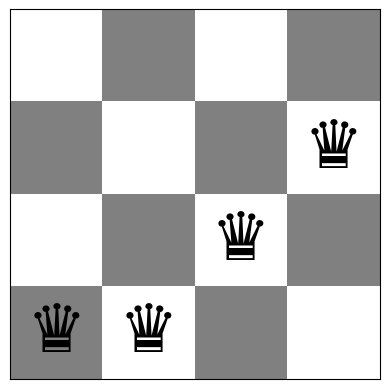

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [20]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


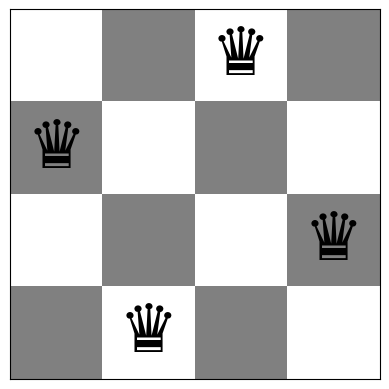

In [21]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Initial arrangement:
Board with 8 conflicts.


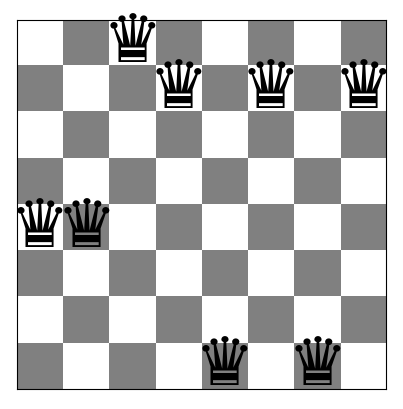

Optimal arrangement:
Board with 0 conflicts.


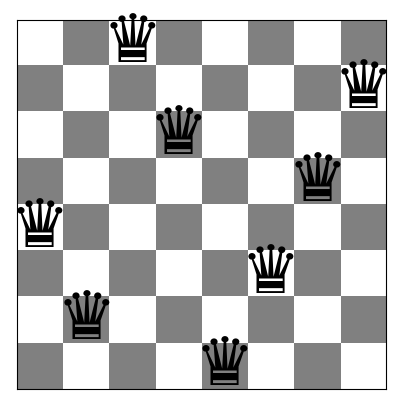

In [22]:
# Steps to calculate the objective function (number of conflicts)
import numpy as np

# Function to perform Steepest-ascend Hill Climbing Search
def steepest_ascent_hill_climbing(initial_board):
    current_board = initial_board
    current_conflicts = conflicts(current_board)

    while True:
        neighbors = generate_neighbors(current_board)
        best_neighbor = current_board
        best_conflicts = current_conflicts

        for neighbor in neighbors:
            neighbor_conflicts = conflicts(neighbor)
            if neighbor_conflicts < best_conflicts:
                best_neighbor = neighbor
                best_conflicts = neighbor_conflicts
        
        if best_conflicts >= current_conflicts:
            break  # Local optimum reached
        else:
            current_board = best_neighbor
            current_conflicts = best_conflicts
    
    return current_board

# Example usage:
initial_board = random_board(8)  # Random initial state
print("Initial arrangement:")
show_board(initial_board)

solution = steepest_ascent_hill_climbing(initial_board)
print("Optimal arrangement:")
show_board(solution)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Initial arrangement:
Board with 8 conflicts.


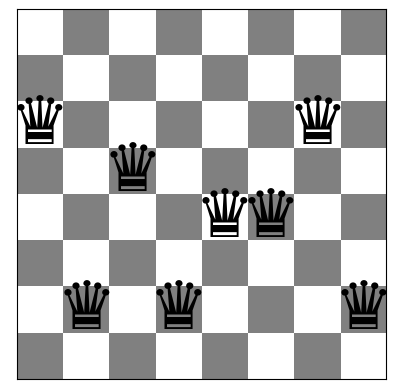

Optimal arrangement:
Board with 1 conflicts.


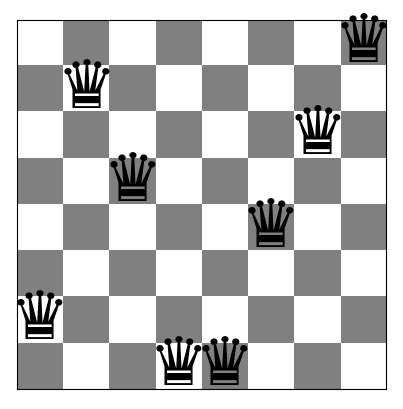

In [30]:
# Code and description go here
def stochastic_hill_climbing_1(initial_board):
    """Perform Stochastic Hill Climbing 1."""
    current_board = initial_board
    current_conflicts = conflicts(current_board)

    while True:
        neighbors = generate_neighbors(current_board)
        uphill_neighbors = []

        for neighbor in neighbors:
            neighbor_conflicts = conflicts(neighbor)
            if neighbor_conflicts < current_conflicts:
                uphill_neighbors.append(neighbor)

        if not uphill_neighbors:
            break  # Local optimum reached
        else:
            current_board = uphill_neighbors[np.random.randint(0, len(uphill_neighbors))]
            current_conflicts = conflicts(current_board)

    return current_board

# Example usage
initial_board = random_board(8)  # Random initial state
print("Initial arrangement:")
show_board(initial_board)

solution = stochastic_hill_climbing_1(initial_board)
print("Optimal arrangement:")
show_board(solution)


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Initial arrangement:
Board with 6 conflicts.


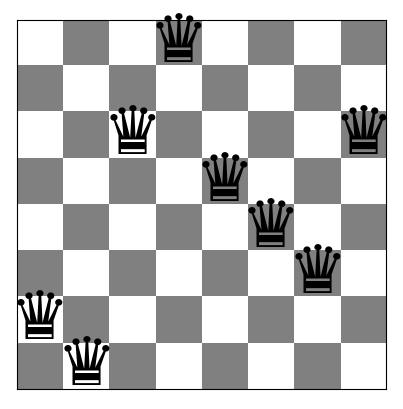

Optimal arrangement:
Board with 5 conflicts.


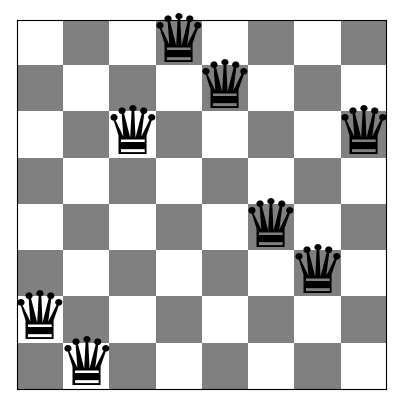

In [31]:
# To generate Stochastic Hill Climinbg 2, we can generate a single randome local neighbor with the function, and then applying it accordingly.

# Stochastic Hill Climbing 2 (First-choice hill climbing)
def generate_random_neighbor(board):
    """Generate a single random neighboring state."""
    n = len(board)
    col = np.random.randint(0, n)
    row = np.random.randint(0, n)
    while board[col] == row:
        row = np.random.randint(0, n)
    neighbor = list(board)
    neighbor[col] = row
    return neighbor

def stochastic_hill_climbing_2(initial_board, max_tries=10):
    """Perform Stochastic Hill Climbing 2."""
    current_board = initial_board
    current_conflicts = conflicts(current_board)
    tries_without_improvement = 0

    while tries_without_improvement < max_tries:
        neighbor = generate_random_neighbor(current_board)
        neighbor_conflicts = conflicts(neighbor)

        if neighbor_conflicts < current_conflicts:
            current_board = neighbor
            current_conflicts = neighbor_conflicts
            tries_without_improvement = 0
        else:
            tries_without_improvement += 1

    return current_board

# Example usage
initial_board = random_board(8)  # Random initial state
print("Initial arrangement:")
show_board(initial_board)

solution = stochastic_hill_climbing_2(initial_board)
print("Optimal arrangement:")
show_board(solution)

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

Optimal arrangement (Steepest-ascend Hill Climbing):
Board with 0 conflicts.


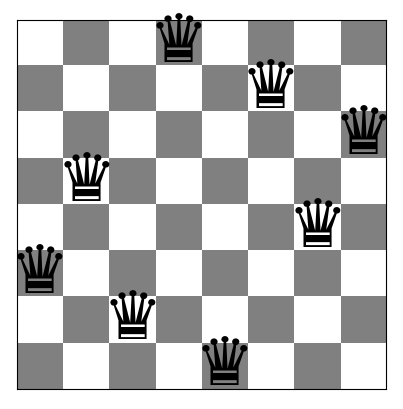

Optimal arrangement (Stochastic Hill Climbing 1):
Board with 0 conflicts.


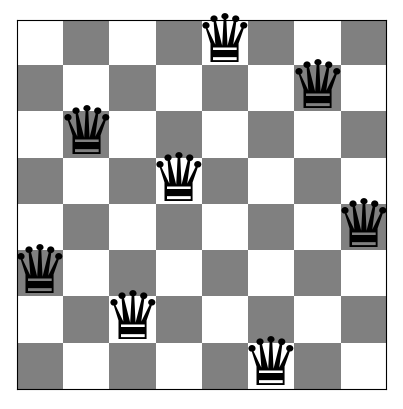

Optimal arrangement (Stochastic Hill Climbing 2):
Board with 0 conflicts.


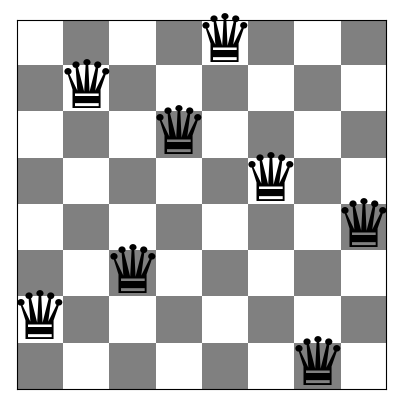

In [32]:
# Hill Climbing Search with Random Restarts
def hill_climbing_with_random_restarts(algorithm, num_restarts=100, board_size=8):
    """Perform Hill Climbing Search with Random Restarts."""
    best_solution = None
    best_conflicts = float('inf')

    for _ in range(num_restarts):
        initial_board = random_board(board_size)
        solution = algorithm(initial_board)
        solution_conflicts = conflicts(solution)

        if solution_conflicts < best_conflicts:
            best_solution = solution
            best_conflicts = solution_conflicts

    return best_solution

# Example usage
# Replace the algorithm parameter with the desired hill climbing function (e.g., steepest_ascent_hill_climbing)
solution = hill_climbing_with_random_restarts(steepest_ascent_hill_climbing)
print("Optimal arrangement (Steepest-ascend Hill Climbing):")
show_board(solution)

solution = hill_climbing_with_random_restarts(stochastic_hill_climbing_1)
print("Optimal arrangement (Stochastic Hill Climbing 1):")
show_board(solution)

solution = hill_climbing_with_random_restarts(stochastic_hill_climbing_2)
print("Optimal arrangement (Stochastic Hill Climbing 2):")
show_board(solution)


## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms.
2. Discuss your choice of annealing schedule.

Initial arrangement:
Board with 11 conflicts.


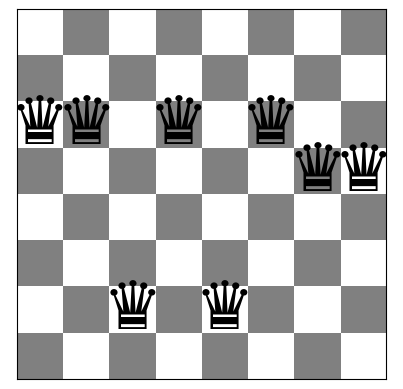

Optimal arrangement:
Board with 0 conflicts.


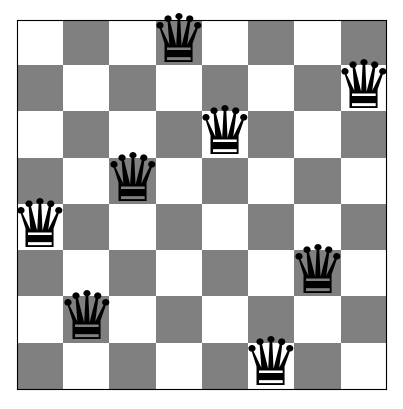

'\n\nIn terms of performance, simulated annealing generally performs better than hill climbing algorithms when dealing with optimization problems with\nrugged search spaces or multiple local optima. This is because simulated annealing has a mechanism (temperature) to escape local optima by accepting downhill \nmoves probabilistically.\n\n'

In [34]:
import math

"""
In this example, I used exponential cooling, which decreases the temperature exponentially with each iteration. This gradual decrease allows the algorithm to
explore a wider range of solutions initially and then focus on refining the search as the temperature decreases. 

More information can be found here: https://www.mathworks.com/help/gads/how-simulated-annealing-works.html#bq3a9do-1
"""


# Simulated Annealing
def generate_neighbor(board):
    """Generate a random neighboring state."""
    n = len(board)
    col = np.random.randint(0, n)
    row = np.random.randint(0, n)
    while board[col] == row:
        row = np.random.randint(0, n)
    neighbor = list(board)
    neighbor[col] = row
    return neighbor

def acceptance_probability(delta_E, temperature):
    """Calculate acceptance probability based on the change in objective function value (delta_E) and temperature."""
    return math.exp(-delta_E / temperature)

def simulated_annealing(initial_board, initial_temperature, cooling_schedule, max_iterations):
    """Perform Simulated Annealing."""
    current_board = initial_board
    current_conflicts = conflicts(current_board)
    temperature = initial_temperature

    for iteration in range(max_iterations):
        neighbor = generate_neighbor(current_board)
        neighbor_conflicts = conflicts(neighbor)
        delta_E = neighbor_conflicts - current_conflicts

        if delta_E < 0:
            current_board = neighbor
            current_conflicts = neighbor_conflicts
        else:
            probability = acceptance_probability(delta_E, temperature)
            if np.random.rand() < probability:
                current_board = neighbor
                current_conflicts = neighbor_conflicts

        temperature = cooling_schedule(iteration)

    return current_board

# Example usage
initial_board = random_board(8)  # Random initial state
print("Initial arrangement:")
show_board(initial_board)

# Define annealing schedule (e.g., exponential cooling)
initial_temperature = 100
def exponential_cooling(iteration):
    return initial_temperature * 0.95 ** iteration  # Decrease temperature exponentially

solution = simulated_annealing(initial_board, initial_temperature, exponential_cooling, max_iterations=1000)
print("Optimal arrangement:")
show_board(solution)


"""

In terms of performance, simulated annealing generally performs better than hill climbing algorithms when dealing with optimization problems with
rugged search spaces or multiple local optima. This is because simulated annealing has a mechanism (temperature) to escape local optima by accepting downhill 
moves probabilistically.

"""

## Task 6: Compare Performance [10 Points]

Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |


Add the used code and the answer to the following questions below.

* How do the algorithms scale with problem size? You will need to run more board sizes. You can add the results to the table above and show the result as a chart.

* What is the largest board each algorithm can solve in a reasonable amount time?

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

In [42]:
# Wrapper Function for comparing performance
import time

def run_algorithm(algorithm, board_size, initial_temperature=None, cooling_schedule=None, max_iterations=None, num_iterations=100):
    """Run the algorithm multiple times with different initial boards and record performance metrics."""
    total_runtime = 0
    total_conflicts = 0
    num_optimal_solutions = 0

    for _ in range(num_iterations):
        initial_board = random_board(board_size)
        start_time = time.time()
        if algorithm == simulated_annealing:
            solution = algorithm(initial_board, initial_temperature, cooling_schedule, max_iterations)
        else:
            solution = algorithm(initial_board)
        end_time = time.time()
        runtime = end_time - start_time
        conflicts_count = conflicts(solution)
        total_runtime += runtime
        total_conflicts += conflicts_count
        if conflicts_count == 0:
            num_optimal_solutions += 1

    avg_runtime = total_runtime / num_iterations
    avg_conflicts = total_conflicts / num_iterations
    percent_optimal_solutions = (num_optimal_solutions / num_iterations) * 100

    return avg_runtime, avg_conflicts, percent_optimal_solutions

In [47]:
# Steepest_ascent_hill_climbing
avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(steepest_ascent_hill_climbing, board_size=4)
print("Steepest asc. HC (Board size 4):")
print("Avg. Run time:", avg_runtime)
print("Avg. number of conflicts:", avg_conflicts)
print("% of runs ending in optimal solution:", percent_optimal_solutions)
print("\n")

# stochastic_hill_climbing_1
avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(stochastic_hill_climbing_1, board_size=4)
print("Stochastic Hill Climbing1 (Board size 4):")
print("Avg. Run time:", avg_runtime)
print("Avg. number of conflicts:", avg_conflicts)
print("% of runs ending in optimal solution:", percent_optimal_solutions)
print("\n")

# stochastic_hill_climbing_2
avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(stochastic_hill_climbing_2, board_size=4)
print("Stochastic Hill Climbing2 (Board size 4):")
print("Avg. Run time:", avg_runtime)
print("Avg. number of conflicts:", avg_conflicts)
print("% of runs ending in optimal solution:", percent_optimal_solutions)
print("\n")

# simulated_annealing
initial_temperature = 100
cooling_schedule = exponential_cooling
max_iterations = 1000

avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(simulated_annealing, board_size=4, initial_temperature=initial_temperature, cooling_schedule=cooling_schedule, max_iterations=max_iterations)
print("Simulated Annealing (Board size 4):")
print("Avg. Run time:", avg_runtime)
print("Avg. number of conflicts:", avg_conflicts)
print("% of runs ending in optimal solution:", percent_optimal_solutions)


Steepest asc. HC (Board size 4):
Avg. Run time: 0.000325624942779541
Avg. number of conflicts: 0.69
% of runs ending in optimal solution: 40.0


Stochastic Hill Climbing1 (Board size 4):
Avg. Run time: 0.00027538061141967773
Avg. number of conflicts: 0.86
% of runs ending in optimal solution: 28.999999999999996


Stochastic Hill Climbing2 (Board size 4):
Avg. Run time: 0.00016123533248901367
Avg. number of conflicts: 1.15
% of runs ending in optimal solution: 25.0


Simulated Annealing (Board size 4):
Avg. Run time: 0.007967839241027832
Avg. number of conflicts: 0.0
% of runs ending in optimal solution: 100.0


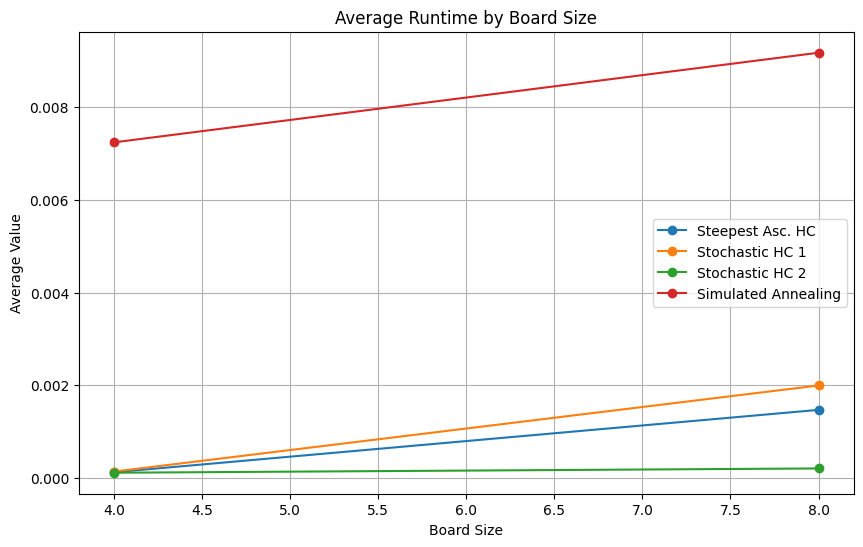

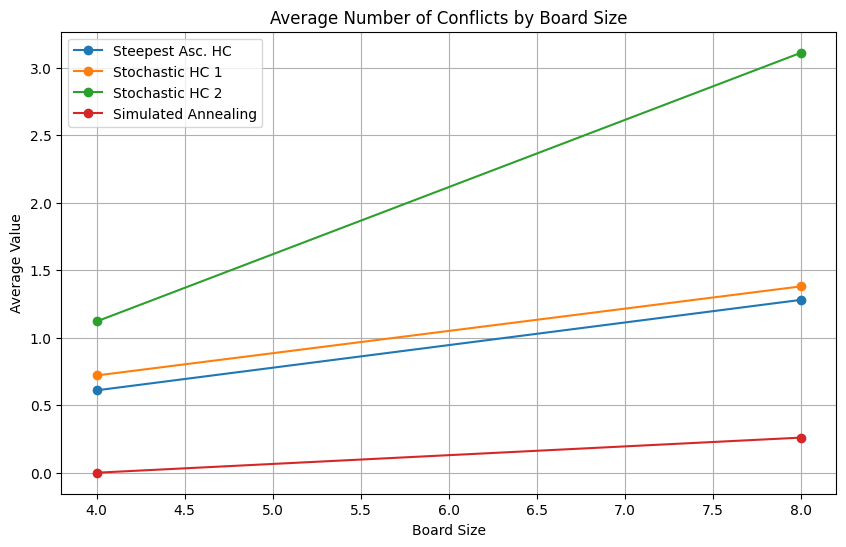

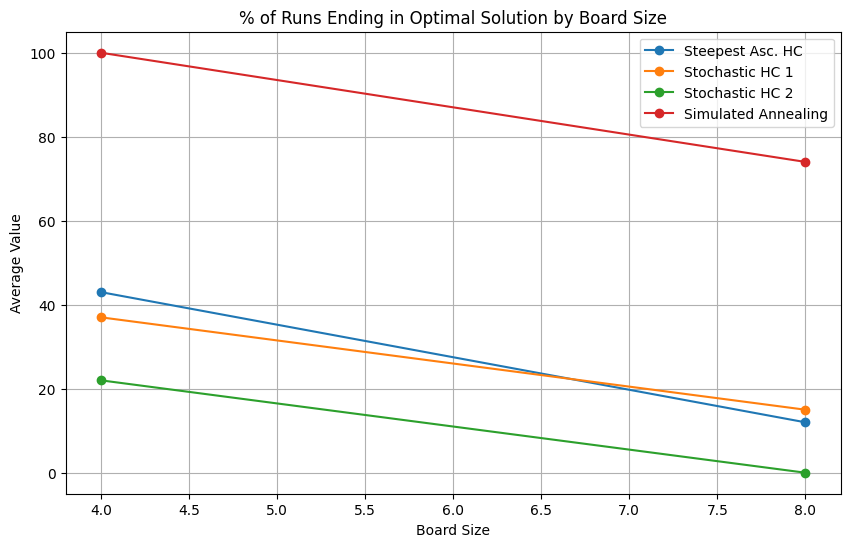

| Algorithm | Board Size | Avg. Run Time | Avg. Conflicts | % Optimal Solution |
| --- | --- | --- | --- | --- |
| Steepest Asc. HC | 4 | 0.00012490272521972656 | 0.61 | 43.0 |
| Steepest Asc. HC | 8 | 0.0014711308479309082 | 1.28 | 12.0 |
| Stochastic HC 1 | 4 | 0.000139923095703125 | 0.72 | 37.0 |
| Stochastic HC 1 | 8 | 0.0019973969459533693 | 1.38 | 15.0 |
| Stochastic HC 2 | 4 | 0.00011517047882080078 | 1.12 | 22.0 |
| Stochastic HC 2 | 8 | 0.00020735740661621094 | 3.11 | 0.0 |
| Simulated Annealing | 4 | 0.007241342067718506 | 0.0 | 100.0 |
| Simulated Annealing | 8 | 0.009174809455871583 | 0.26 | 74.0 |



In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define functions for your algorithms and run_algorithm function here

# Function to plot performance metrics
def plot_performance_metrics(metrics, labels, title, board_sizes):
    plt.figure(figsize=(10, 6))
    for i, metric in enumerate(metrics):
        plt.plot(board_sizes, metric, marker='o', label=labels[i])
    plt.xlabel('Board Size')
    plt.ylabel('Average Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to generate markdown table from data
def generate_markdown_table(data, headers):
    markdown_table = "| " + " | ".join(headers) + " |\n"
    markdown_table += "| " + " | ".join(["---"] * len(headers)) + " |\n"
    for row in data:
        markdown_table += "| " + " | ".join(map(str, row)) + " |\n"
    return markdown_table

# Example usage:
board_sizes = [4, 8]
algorithms = [steepest_ascent_hill_climbing, stochastic_hill_climbing_1, stochastic_hill_climbing_2, simulated_annealing]
algorithm_labels = ['Steepest Asc. HC', 'Stochastic HC 1', 'Stochastic HC 2', 'Simulated Annealing']

metrics_runtime = []
metrics_conflicts = []
metrics_optimal_solution = []

for algorithm in algorithms:
    runtime_values = []
    conflicts_values = []
    optimal_solution_values = []
    for size in board_sizes:
        if algorithm == simulated_annealing:
            initial_temperature = 100  # Define initial temperature here
            cooling_schedule = exponential_cooling  # Define cooling schedule here
            max_iterations = 1000  # Define max iterations here
            avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(algorithm, board_size=size, initial_temperature=initial_temperature, cooling_schedule=cooling_schedule, max_iterations=max_iterations)
        else:
            avg_runtime, avg_conflicts, percent_optimal_solutions = run_algorithm(algorithm, board_size=size)
        runtime_values.append(avg_runtime)
        conflicts_values.append(avg_conflicts)
        optimal_solution_values.append(percent_optimal_solutions)
    metrics_runtime.append(runtime_values)
    metrics_conflicts.append(conflicts_values)
    metrics_optimal_solution.append(optimal_solution_values)

# Plotting runtime metrics
plot_performance_metrics(metrics_runtime, algorithm_labels, 'Average Runtime by Board Size', board_sizes)

# Plotting conflicts metrics
plot_performance_metrics(metrics_conflicts, algorithm_labels, 'Average Number of Conflicts by Board Size', board_sizes)

# Plotting optimal solution metrics
plot_performance_metrics(metrics_optimal_solution, algorithm_labels, '% of Runs Ending in Optimal Solution by Board Size', board_sizes)

# Generating markdown table for results
headers = ['Algorithm', 'Board Size', 'Avg. Run Time', 'Avg. Conflicts', '% Optimal Solution']
data = []
for i, algorithm in enumerate(algorithm_labels):
    for j, size in enumerate(board_sizes):
        data.append([algorithm, size, metrics_runtime[i][j], metrics_conflicts[i][j], metrics_optimal_solution[i][j]])

markdown_table = generate_markdown_table(data, headers)
print(markdown_table)


## Advanced task: Exploring other Local Moves

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

Implement a few different local moves. Implement:

* moving one queen only one square at a time
* switching two columns
* move two queens at a time

Compare the performance of these moves for the 8-Queens problem using your stochastic hill climbing 2 implementation from above. Also consider mixing the use of several types of local moves (e.g., move one queen and moving two queens).

Describe what you find out about how well these moves and combinations of these moves work.

In [28]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [29]:
# Code and description go here